In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# source: https://data.gov.uk/dataset/road-accidents-safety-data/resource/8ecee6ac-33fd-4f5b-8973-e900cc65d24a
dwLink = 'https://dl.dropboxusercontent.com/u/45463862/Casualties0514.csv.tar.gz'
descDwLink = 'https://dl.dropboxusercontent.com/u/45463862/Road-Accident-Safety-Data-Guide-1979-2004.xls'

In [2]:
df = pd.read_csv(dwLink, compression='gzip')
descDict = pd.read_excel(descDwLink, sheetname=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
Casualties0514.csv                    object
Vehicle_Reference                     int64
Casualty_Reference                    int64
Casualty_Class                        int64
Sex_of_Casualty                       int64
Age_of_Casualty                       int64
Age_Band_of_Casualty                  int64
Casualty_Severity                     int64
Pedestrian_Location                   int64
Pedestrian_Movement                   int64
Car_Passenger                         int64
Bus_or_Coach_Passenger                int64
Pedestrian_Road_Maintenance_Worker    int64
Casualty_Type                         int64
Casualty_Home_Area_Type               int64
dtypes: int64(14), object(1)
memory usage: 262.1+ MB


In [4]:
df.head()

,Casualties0514.csv,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [5]:
#df.Vehicle_Reference.unique()

In [6]:
df.columns

Index(['Casualties0514.csv', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [7]:
df = df[['Casualties0514.csv', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Casualty_Type',
       'Casualty_Home_Area_Type']]

In [8]:
#df.drop(['Casualty_Reference'], axis=1, inplace=True)

In [9]:
for k in descDict.keys():
    print(k)

Light Conditions
Road Type
Veh Leaving Carriageway
Car Passenger
Casualty Severity
Vehicle Location
Junction Detail
Road Surface
Local Authority (District)
Vehicle Propulsion Code
Local Authority (Highway)
Vehicle Type
2nd Road Class
Weather
IMD Decile
Was Vehicle Left Hand Drive
Police Force
Sex of Driver
Home Area Type
Sex of Casualty
1st Road Class
Urban Rural
Casualty Class
Junction Control
Special Conditions at Site
Police Officer Attend
Ped Location
Towing and Articulation
Ped Cross - Human
1st Point of Impact
Bus Passenger
Ped Movement
Hit Object in Carriageway
Ped Cross - Physical
Age Band
Accident Severity
Casualty Type
Day of Week
Skidding and Overturning
Ped Road Maintenance Worker
Hit Object Off Carriageway
Journey Purpose
Export Variables
Carriageway Hazards
Vehicle Manoeuvre
Junction Location
Introduction


In [10]:
descDict['Casualty Class'].set_index('code')['label']

code
1    Driver or rider
2          Passenger
3         Pedestrian
Name: label, dtype: object

In [11]:
#df.head()

In [14]:
#df.Casualty_Class.map?

In [12]:
#df.Casualty_Reference.unique()

In [13]:
df['Casualty_Class'] = df.Casualty_Class.map(descDict['Casualty Class'].set_index('code')['label'])

In [14]:
df.Casualty_Class.head()

0         Pedestrian
1          Passenger
2    Driver or rider
3         Pedestrian
4    Driver or rider
Name: Casualty_Class, dtype: object

In [15]:
df.Casualty_Class.value_counts()

Driver or rider    1398378
Passenger           542477
Pedestrian          275865
Name: Casualty_Class, dtype: int64

In [16]:
df.Casualty_Class.unique()

array(['Pedestrian', 'Passenger', 'Driver or rider'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216720 entries, 0 to 2216719
Data columns (total 10 columns):
Casualties0514.csv         object
Vehicle_Reference          int64
Casualty_Reference         int64
Casualty_Class             object
Sex_of_Casualty            int64
Age_of_Casualty            int64
Age_Band_of_Casualty       int64
Casualty_Severity          int64
Casualty_Type              int64
Casualty_Home_Area_Type    int64
dtypes: int64(8), object(2)
memory usage: 169.1+ MB


In [18]:
df[df['Casualties0514.csv'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576123 entries, 8 to 2216719
Data columns (total 10 columns):
Casualties0514.csv         576123 non-null object
Vehicle_Reference          576123 non-null int64
Casualty_Reference         576123 non-null int64
Casualty_Class             576123 non-null object
Sex_of_Casualty            576123 non-null int64
Age_of_Casualty            576123 non-null int64
Age_Band_of_Casualty       576123 non-null int64
Casualty_Severity          576123 non-null int64
Casualty_Type              576123 non-null int64
Casualty_Home_Area_Type    576123 non-null int64
dtypes: int64(8), object(2)
memory usage: 44.0+ MB


In [19]:
df['Year'] = df['Casualties0514.csv'].apply(lambda x: x[:4]).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216720 entries, 0 to 2216719
Data columns (total 11 columns):
Casualties0514.csv         object
Vehicle_Reference          int64
Casualty_Reference         int64
Casualty_Class             object
Sex_of_Casualty            int64
Age_of_Casualty            int64
Age_Band_of_Casualty       int64
Casualty_Severity          int64
Casualty_Type              int64
Casualty_Home_Area_Type    int64
Year                       int32
dtypes: int32(1), int64(8), object(2)
memory usage: 177.6+ MB


In [21]:
df.groupby(['Year', 'Casualty_Class']).size().unstack(0)

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Casualty_Class,,,,,,,,,,
Driver or rider,168209,161523,155440,144941,139671,131200,129047,124418,118208,125721
Passenger,69527,65899,62149,57482,55588,51603,48705,46087,41429,44008
Pedestrian,33281,30982,30191,28482,26887,25845,26198,25218,24033,24748


In [22]:
#df.head()

In [23]:
descDict['Sex of Casualty'].set_index('code')['label']

code
 1                            Male
 2                          Female
-1    Data missing or out of range
Name: label, dtype: object

In [24]:
df.replace(-1, np.nan, inplace=True)

In [25]:
df.Sex_of_Casualty.unique()

array([  1.,   2.,  nan])

In [26]:
df['Sex_of_Casualty'] = df.Sex_of_Casualty.map(descDict['Sex of Casualty'].set_index('code')['label'])

In [27]:
df.groupby(['Year', 'Sex_of_Casualty']).size().unstack(0)

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Sex_of_Casualty,,,,,,,,,,
Female,113087,108111,103292,97250,93390,88117,84445,81277,75446,79413
Male,157797,150212,144363,133478,128711,120490,119498,114439,108213,115061


In [28]:
descDict['Casualty Severity'].set_index('code')['label']

code
1      Fatal
2    Serious
3     Slight
Name: label, dtype: object

In [29]:
df['Casualty_Severity'] = df.Casualty_Severity.map(descDict['Casualty Severity'].set_index('code')['label'])

In [30]:
#df.head()

In [31]:
df.groupby(['Year', 'Sex_of_Casualty', 'Casualty_Severity']).size().unstack(0)

Year                                 2005    2006    2007    2008    2009  \
Sex_of_Casualty Casualty_Severity                                           
Female          Fatal                 785     771     729     655     569   
                Serious              8923    8785    8479    8116    7591   
                Slight             103379   98555   94084   88479   85230   
Male            Fatal                2416    2401    2217    1882    1653   
                Serious             20026   19886   19289   17907   17098   
                Slight             135355  127925  122857  113689  109960   

Year                                 2010    2011   2012   2013   2014  
Sex_of_Casualty Casualty_Severity                                       
Female          Fatal                 484     478    416    442    465  
                Serious              7223    7066   7109   6644   6992  
                Slight              80410   76901  73752  68360  71956  
Male            Fatal                1366    1423   1338   1271   1310  
                Serious             15434   16055  15929  15011  15815  
                Slight             103690  102020  97172  91931  97936

In [32]:
descDict['Age Band'].set_index('code')['label']

code
1       0 - 5
2      6 - 10
3     11 - 15
4     16 - 20
5     21 - 25
6     26 - 35
7     36 - 45
8     46 - 55
9     56 - 65
10    66 - 75
11    Over 75
Name: label, dtype: object

In [33]:
df['Age_Band_of_Casualty'] = df.Age_Band_of_Casualty.map(descDict['Age Band'].set_index('code')['label'])

In [63]:
df[df.Casualty_Severity == 'Fatal'].groupby(['Year', 'Age_Band_of_Casualty']).size().unstack(0)

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Age_Band_of_Casualty,,,,,,,,,,
0 - 5,28,34,28,29,16,15,12,19,12,10
11 - 15,81,97,73,61,49,23,33,28,26,29
16 - 20,525,505,453,384,325,275,206,212,186,167
21 - 25,391,424,375,319,262,186,221,204,231,225
26 - 35,541,499,464,403,350,270,295,257,249,273
36 - 45,459,452,427,374,344,275,270,233,211,223
46 - 55,329,310,345,275,277,243,269,221,255,224
56 - 65,237,253,217,187,182,188,167,165,153,171
6 - 10,32,38,20,34,16,17,15,14,10,14


In [35]:
#df[df.Casualty_Severity == 'Fatal'].groupby(['Year', 'Age_Band_of_Casualty', 'Sex_of_Casualty']).size().unstack(0)
#df[df.Casualty_Severity == 'Fatal'].tail()

In [38]:
%matplotlib inline

In [65]:
dfToPlot = df[df.Casualty_Severity == 'Fatal'].groupby(['Year', 'Sex_of_Casualty']).size().unstack(1)

In [66]:
dfToPlot.index = pd.to_datetime(dfToPlot.index, format='%Y')

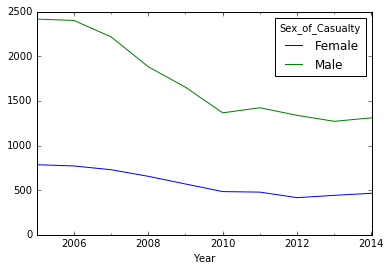

In [67]:
dfToPlot.plot()

In [70]:
dfToPlot2 = df[df.Casualty_Severity == 'Fatal'].groupby(['Age_Band_of_Casualty']).size()

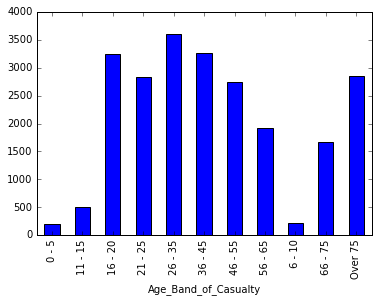

In [73]:
dfToPlot2.plot.bar()

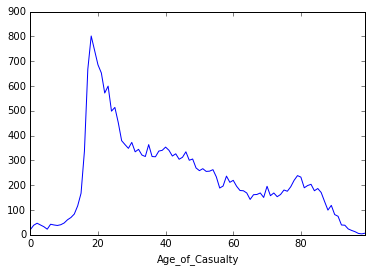

In [76]:
df[df.Casualty_Severity == 'Fatal'].groupby(['Age_of_Casualty']).size().plot()

In [100]:
df[df.Casualty_Severity == 'Fatal'].groupby(['Year','Age_of_Casualty']).size().unstack(0).idxmax()
df[df.Casualty_Severity == 'Fatal'].groupby(['Year','Age_of_Casualty']).size().unstack(0).max()

Year
2005-01-01    127
2006-01-01    119
2007-01-01    115
2008-01-01     95
2009-01-01     86
2010-01-01     72
2011-01-01     51
2012-01-01     59
2013-01-01     55
2014-01-01     54
dtype: float64

In [93]:
df[df.Casualty_Severity == 'Fatal'].groupby(['Age_of_Casualty']).size().idxmax()

18.0

In [94]:
df[df.Casualty_Severity == 'Fatal'].groupby(['Age_of_Casualty']).size().max()

802

In [97]:
df['Year'] = pd.to_datetime(df.Year, format='%Y')

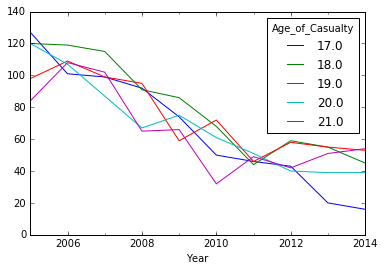

In [98]:
df[(df.Casualty_Severity == 'Fatal') & (df.Age_of_Casualty.isin([17,18,19,20,21]))].groupby(['Year','Age_of_Casualty']).size().unstack(1).plot()